# Black Scholes Model for Option Pricing

The Black-Scholes model is a partial differential equation that was first published in an article called 'The Pricing of Options and Corporate Liabilities' in 1973. The model is named after the two people who came up with it, Fischer Black and Myron Scholes. 

The solution of this PDE gives us what is commonly known as the Black-Scholes formula and this is used to calculate the price of an European option.

## Black-Scholes Equation
$$\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2S^2\frac{\partial V}{\partial S} + rS\frac{\partial V}{\partial S} - rV = 0 $$
here $S$ is the current value of the underlying asset, $t$ is time, $V(S,t)$ is a function that determines the value of the option and $\sigma$ represents the volatility of the asset.


## Black-Scholes Formula
### Call Option

The solution for the European call Option with constant r and $\sigma$ is 

$$C(S,t) = SN(d_1) - Ke^{-r(T-t)} N(d_2)$$

where $K$ is the strike price, $N(d)$ is the cumulative distribution function for a standardised normal random variable given by

$$ N(d) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^d {e^{-\frac{y^2}{2}} dy}$$

and here 

$$d_1 = \frac{\log(\frac{S}{K}) + (r + \frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}$$

$$d_2 = \frac{\log(\frac{S}{K}) + (r - \frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}$$

### Put Option

The solution is given by

$$ P(S,t) = Ke^{-r(T-t)} N(-d_2) - SN(-d_1) $$

and $d_1$ and $d_2$ represent the same as above.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
norm = norm.cdf

def bsm_call(stock, strike, dte, rate, vol):
    ''' Computing the call option price '''
    d1 = (np.log(stock/strike) + dte*(rate + (vol ** 2)/2))/(vol*(np.sqrt(dte)))
    d2 = d1 - (vol*(np.sqrt(dte)))
    call = stock * norm(d1) - norm(d2) * strike * np.exp(-rate*dte)
    return call
    
def bsm_put(stock, strike, dte, rate, vol):
    ''' Computing the put option price'''
    d1 = (np.log(stock/strike) + dte*(rate + (vol ** 2)/2))/(vol*(np.sqrt(dte)))
    d2 = d1 - (vol*(np.sqrt(dte)))
    put = norm(-d2) * strike * np.exp(-rate * dte) - norm(-d1) * stock
    return put

## Effect of Stock Price on Option Value

In this following section we are going to hold all the variables constant except the current stock price and observe how the call and put option prices change.

In [3]:
stock_price = np.arange(85, 120, 0.5)
strike_price = 100
days_to_expiry = 1
interest_rate = 0.06
volatility = 0.1

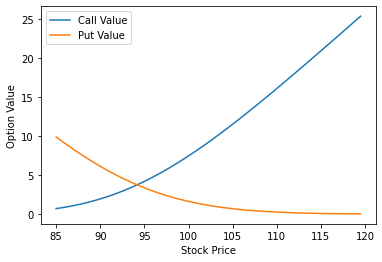

In [4]:
call_option = [bsm_call(s, strike_price, days_to_expiry, interest_rate, volatility) for s in stock_price]
put_option = [bsm_put(s, strike_price, days_to_expiry, interest_rate, volatility) for s in stock_price]
plt.plot(stock_price, call_option, label = 'Call Value')
plt.plot(stock_price, put_option, label = 'Put Value')
plt.xlabel('Stock Price')
plt.ylabel('Option Value')
plt.legend()


## Effect of Time on Option Value

In this following section we are going to hold all the variables constant except the days to expiry and observe how the call and put option prices change.

In [5]:
stock_price = 1000
strike_price = 1500
days_to_expiry = np.arange(1, 100)
interest_rate = 0.06
volatility = 0.1

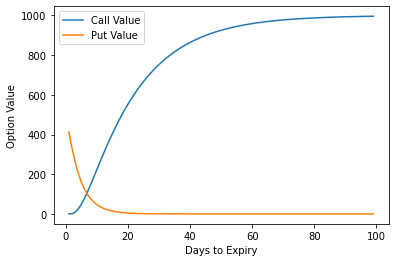

In [6]:
call_option = [bsm_call(stock_price, strike_price, dte, interest_rate, volatility) for dte in days_to_expiry]
put_option = [bsm_put(stock_price, strike_price, dte, interest_rate, volatility) for dte in days_to_expiry]
plt.plot(days_to_expiry, call_option, label = 'Call Value')
plt.plot(days_to_expiry, put_option, label = 'Put Value')
plt.xlabel('Days to Expiry')
plt.ylabel('Option Value')
plt.legend()


## Assumptions

There are a few limitations to the Black-Scholes equation, these following assumptions were made while solving: 


* The volatality, $\sigma$ is constant and known
* The rate $r$ is risk-free and also known and constant
* No taxes or transaction costs were incurred
* No dividends were paid out during the life of the contract
* This formula can only be applied to European options

